# Business in Elche

## Opening a Padel Tennis Club in Elche

In times of Covid-19, the people is concerned about the minimum distance across individuals. So an investor is willing to open a Padel Tennis Club where people can do sport in a secure way.

In order to achieve this objective, we're going to use Foursquare API to know where can be a good location and where are the other similar clubs, trying to be a step away from other clubs.

This club is for people who wants to stay healthy and to achieve this status, they want to do it in a funny and secure way.

## Data section

For this project, we are using the Foursquare API location to know in neighborhoods has a Padel Tennis Club and how common it is. Also, in order to make this project more reliable, there will be an approximation on the annual income of each neighborhood, because people with more income wants to be social distinguised, so this also attracts other people that want to enter in this world.

The *Neighborhoods* and *Annual Income* for each neighborhood are going to be introduced manually because they aren't easily accesible across internet. Then we are goint to download all venues from the Foursquare API that has each neighborhood. After this, we search the neighborhood that has a Padel Tennis Club or similar. Then we see if there is a relation between the annual income and the existence of a Padel Tennis Club. Finally, we select an appropiate neighborhood to locate the Padel Tennis Club if there is a good one.

## Import libraries

In [18]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium # map rendering library
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# import k-means from clustering stage
from sklearn.cluster import KMeans
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

### Create DataFrame of *Postal Codes*, *Neighborhoods* and *Annual Income* in Elche with pandas

Create a DataFrame manually as this information is only available locally.

In [117]:
data = {"Postal Code" : ["03139", "03194", "03195", "03201", "03202", "03203", "03204", "03205","03206", "03207", "03208", "03291", "03292", "03294", "03295", "03296", "03320"],
       "Borough" : ["Camp d'Elx", "Camp d'Elx", "Camp d'Elx", "El Pla", "Altabix", "Altabix", "El Pla", "Carrús", "Carrús", "Camp d'Elx", "Altabix", "Camp d'Elx", "Camp d'Elx", "Camp d'Elx", "Camp d'Elx", "Camp d'Elx", "Torrellano"],
       "Neighborhood" : ["Valverde", "La Marina", "El Altet, Los Arenales", "Pont Nou, El Pla Alt", "Altabix, Candalix, Ciutat Esportiva", "Altabix Sur, Palmerales, La Torreta", "El Pla", "El Toscar", "Carrús Est", "La Galia", "Camp de Futbol", "Bonavista", "Las Bayas", "La Foia", "Maitino, Perleta", "Matola, Algoda", "Torrellano"],
       "Latitude" : [38.236437, 38.147014, 38.265322, 38.265580, 38.271360, 38.263938, 38.258853, 38.268918, 38.273851, 38.283386, 38.264313, 38.299481, 38.217869, 38.210718, 38.262412, 38.232012, 38.291186],
       "Longitude" : [-0.597824, -0.644511, -0.546587, -0.705921, -0.684831, -0.687454, -0.705489, -0.714424, -0.707434, -0.690748, -0.664464, -0.681519, -0.640361, -0.682850, -0.634930, -0.745682, -0.590044],
       "Annual Income" : [22213, 20000, 22213, 21638, 23595, 26155, 18618, 16811, 15320, 20000, 20000, 20000, 20264, 18711, 25067, 22576, 20474]}
df = pd.DataFrame (data, columns = ["Postal Code", "Borough", "Neighborhood", "Latitude", "Longitude", "Annual Income"])
df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Annual Income
0,03139,Camp d'Elx,Valverde,38.236437,-0.597824,22213
1,03194,Camp d'Elx,La Marina,38.147014,-0.644511,20000
2,03195,Camp d'Elx,"El Altet, Los Arenales",38.265322,-0.546587,22213
3,03201,El Pla,"Pont Nou, El Pla Alt",38.265580,-0.705921,21638
4,03202,Altabix,"Altabix, Candalix, Ciutat Esportiva",38.271360,-0.684831,23595


### Shape of the dataframe

In [118]:
df.shape

(17, 6)

### How many unique boroughs has Elche

In [119]:
neighborhoods = df
neighborhoods.drop(["Postal Code", "Annual Income"], axis=1)

,Borough,Neighborhood,Latitude,Longitude
0,Camp d'Elx,Valverde,38.236437,-0.597824
1,Camp d'Elx,La Marina,38.147014,-0.644511
2,Camp d'Elx,"El Altet, Los Arenales",38.265322,-0.546587
3,El Pla,"Pont Nou, El Pla Alt",38.265580,-0.705921
4,Altabix,"Altabix, Candalix, Ciutat Esportiva",38.271360,-0.684831
5,Altabix,"Altabix Sur, Palmerales, La Torreta",38.263938,-0.687454
6,El Pla,El Pla,38.258853,-0.705489
7,Carrús,El Toscar,38.268918,-0.714424
8,Carrús,Carrús Est,38.273851,-0.707434
9,Camp d'Elx,La Galia,38.283386,-0.690748


In [120]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 17 neighborhoods.


#### Use geopy library to get the latitude and longitude values of Elche.

In [121]:
address = 'Elche, Spain'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Elche City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Elche City are 38.2653181, -0.6988488.


#### Create a map of Elche with neighborhoods superimposed on top.

In [122]:
# create map of Elche using latitude and longitude values
map_elche = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_elche)  
    
map_elche

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods

### Define Foursquare Credentials and Version

In [111]:
CLIENT_ID = '3BYUZL4WX20DWNURR5PQQRY5MIHE3PZNE3E0REKDJUZ11L3Z' # your Foursquare ID
CLIENT_SECRET = 'GXQL5JCV1SQW2SHOVHUUIHEEZJ3LJJ2E3PGNLBVDOZIQIFKG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3BYUZL4WX20DWNURR5PQQRY5MIHE3PZNE3E0REKDJUZ11L3Z
CLIENT_SECRET:GXQL5JCV1SQW2SHOVHUUIHEEZJ3LJJ2E3PGNLBVDOZIQIFKG


Let's create the GET request URL

In [112]:
LIMIT = 100
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=3BYUZL4WX20DWNURR5PQQRY5MIHE3PZNE3E0REKDJUZ11L3Z&client_secret=GXQL5JCV1SQW2SHOVHUUIHEEZJ3LJJ2E3PGNLBVDOZIQIFKG&v=20180605&ll=38.236437,-0.597824&radius=500&limit=100'

From the Foursquare lab in the previous module, we know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [113]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Let's create a function to repeat the same process to all the neighborhoods in Elche

In [114]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        #print(url)
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now run the above function on each neighborhood and create a new dataframe called *elche_venues*.

In [29]:
elche_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Valverde
La Marina
El Altet, Los Arenales
Pont Nou, El Pla Alt
Altabix, Candalix, Cases de Fernandez, Ciutat Esportiva, Ciutat Universitaria
Altabix Sur, Palmerales, La Torreta
El Pla
El Toscar
Carrús Est
La Galia
Camp de Futbol
Bonavista
Las Bayas
La Foia
Maitino, Perleta
Matola, Algoda
Torrellano


#### Let's find out how many unique *Tennis Court* are in Elche

In [55]:
print("There are {} Padel Tennis Court in Elche.".format(len(elche_venues[elche_venues["Venue Category"] == "Tennis Court"])))

There are 1 Padel Tennis Court in Elche.


#### In which neighborhood is the Tennis Court?

In [83]:
elche_venues[elche_venues["Venue Category"] == "Tennis Court"].Neighborhood

77    Camp de Futbol
Name: Neighborhood, dtype: object

In *Camp de Futbol* neighborhood

#### Now let's plot the Annual Income across Neighborhoods

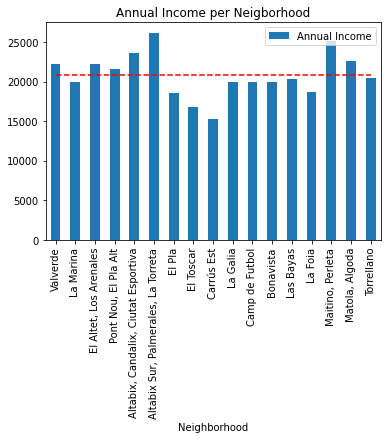

In [142]:
df.plot(x="Neighborhood", y="Annual Income", kind="bar", title="Annual Income per Neigborhood")
plt.hlines(df["Annual Income"].mean(), xmin=0, xmax=16, linestyles='dashed', color = "red")
plt.show()

As we can see the **"Camp de Futbol"** neighborhood is under the mean. So there isn't a relation between *Annual Income* and the existence of a Padel Tenis Club, so we can select any neighborhood with the probabilities of success. So we aren't able to select just one neighborhood.